<a href="https://colab.research.google.com/github/Samir-Adhikari/GlobalSurveyTool/blob/main/hospital_readmission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Hospital Readmission Rates for Diabetic Patients

# Section 1: Introduction

This project focuses on using machine learning to predict whether diabetic patients admitted to a hospital will be readmitted. The main objective is to develop models that can effectively identify the likelihood of readmission within 30 days, beyond 30 days, or no readmission. We will employ various machine learning algorithms, and our approach will emphasize thoughtful data preprocessing, feature engineering, and evaluation.

Given the complexities and challenges in healthcare datasets, we anticipate handling missing values, performing feature selection, and ensuring our models are well-validated to avoid overfitting. The ultimate goal is to derive meaningful insights from the data and propose a model that balances accuracy with interpretability.

# Setup

Import the packages needed to run this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Section 2: Data Import

In [ ]:
training_data_path = '/content/diabetic_data_training.csv'  # Adjust the path if necessary
test_data_path = '/content/diabetic_data_test.csv'

In [ ]:
feature_table_path = '/content/FeatureTable.xlsx'
ids_mapping_path = '/content/IDS_mapping.csv'

# Load the main datasets
df_train = pd.read_csv(training_data_path)
df_test = pd.read_csv(test_data_path)

# Load the additional data files for reference
feature_table = pd.read_excel(feature_table_path)
ids_mapping = pd.read_csv(ids_mapping_path)

# Display the first few rows of each dataset to verify loading
# print("Training Data:")
# display(df_train.head())

# print("\nTest Data:")
# display(df_test.head())

# print("\nFeature Table:")
# display(feature_table.head())

# print("\nIDS Mapping:")
# display(ids_mapping.head())

# Section 3: Data Preprocessing


EXPLORATORY DATA ANALYSIS

In [ ]:
df_train.shape

(91589, 50)

In [ ]:
df_train.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
5,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
7,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,36900,77391171,AfricanAmerican,Male,[60-70),?,2,1,4,7,?,?,62,0,11,0,0,0,157,288,197,7,NaN,NaN,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30


In [ ]:
df_train.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [ ]:
df_train.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.158900e+04,9.158900e+04,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000,91589.000000
mean,1.652026e+08,5.431082e+07,2.022514,3.718503,5.759349,4.395550,43.079180,1.337846,16.018135,0.368811,0.198747,0.634716,7.422365
std,1.026402e+08,3.871289e+07,1.444416,5.284318,4.063074,2.987944,19.676827,1.704700,8.122843,1.272073,0.945813,1.263945,1.933349
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496456e+07,2.340244e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523897e+08,4.545860e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302720e+08,8.754388e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df_train = df_train[[#'encounter_id',
          #'patient_nbr',
          'race', 'gender', 'age', 'weight',
          'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'time_in_hospital',  'payer_code', 'medical_specialty',
          'num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
          'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
          'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
          'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
          'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
          'tolazamide', 'examide', 'citoglipton', 'insulin',
          'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone',
          'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]

df_test = df_test[[#'encounter_id',
          #'patient_nbr',
          'race', 'gender', 'age', 'weight',
          'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'time_in_hospital',  'payer_code', 'medical_specialty',
          'num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
          'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
          'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
          'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
          'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
          'tolazamide', 'examide', 'citoglipton', 'insulin',
          'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone',
          'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']]


In [ ]:
df_train.shape

(91589, 48)

In [ ]:
df_train.columns
#df_train.drop(['encounter_id', 'patient_nbr', 'payer'], axis=1, inplace=True)

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df_train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [ ]:
df_train.replace(['?', 'N/A', 'Missing'], None, inplace=True)
df_train.isnull().sum()

df_test.replace(['?', 'N/A', 'Missing'], None, inplace=True)
df_test.isnull().sum()

,0
race,214
gender,0
age,0
weight,9815
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
payer_code,4009
medical_specialty,4957


In [ ]:
#df_train.duplicated(subset='encounter_id').sum()

In [ ]:
df_train.drop(['payer_code', 'weight', 'max_glu_serum', 'A1Cresult'], axis=1, inplace=True)
df_test.drop(['payer_code', 'weight', 'max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

In [ ]:
df_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
# prompt: use average for age column as the age column give range of age so use the mean instead

# Assuming 'age' column contains age ranges like '[0-10)'
def process_age(df):
    age_mapping = {
        '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
        '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
        '[80-90)': 85, '[90-100)': 95
    }
    df['age'] = df['age'].map(age_mapping)
    return df

df_train = process_age(df_train)
df_test = process_age(df_test)

Feature Understanding

Feature Correlation

In [ ]:
# # Create the pair plot for numerical features
# sns.pairplot(df_train,
#              vars=['age',  'time_in_hospital',
#                   'num_lab_procedures', 'num_procedures',
#                   'num_medications', 'number_outpatient', 'number_emergency',
#                   'number_inpatient', 'number_diagnoses'],
#              hue='readmitted')
# plt.show()

In [ ]:
df_corr = df_train[['age',  'time_in_hospital',
          'num_lab_procedures', 'num_procedures',
          'num_medications', 'number_outpatient', 'number_emergency',
          'number_inpatient', 'number_diagnoses']].dropna().corr()
df_corr

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
age,1.000000,0.109456,0.023280,-0.029927,0.041309,0.025403,-0.086166,-0.041860,0.242785
time_in_hospital,0.109456,1.000000,0.317332,0.192186,0.465646,-0.009314,-0.011147,0.074542,0.219244
num_lab_procedures,0.023280,0.317332,1.000000,0.057495,0.266928,-0.009683,-0.004020,0.040201,0.151496
num_procedures,-0.029927,0.192186,0.057495,1.000000,0.386118,-0.024622,-0.039276,-0.066312,0.074588
num_medications,0.041309,0.465646,0.266928,0.386118,1.000000,0.044342,0.010873,0.064631,0.261657
number_outpatient,0.025403,-0.009314,-0.009683,-0.024622,0.044342,1.000000,0.090155,0.106350,0.094176
number_emergency,-0.086166,-0.011147,-0.004020,-0.039276,0.010873,0.090155,1.000000,0.263818,0.055313
number_inpatient,-0.041860,0.074542,0.040201,-0.066312,0.064631,0.106350,0.263818,1.000000,0.106174
number_diagnoses,0.242785,0.219244,0.151496,0.074588,0.261657,0.094176,0.055313,0.106174,1.000000


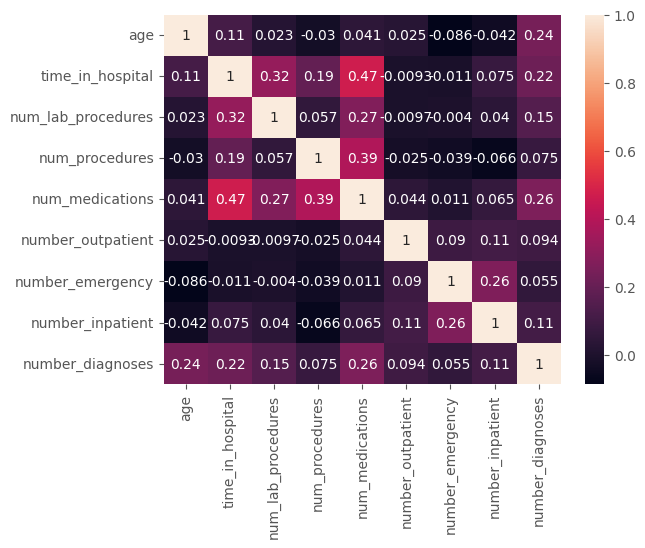

In [ ]:
sns.heatmap(df_corr, annot=True)
plt.show()

In [ ]:
df_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

# List of columns you want to analyze against 'race'
columns_to_analyze = ['gender', 'admission_type_id', 'discharge_disposition_id',
                     'admission_source_id', 'medical_specialty', 'diag_1',
                     'diag_2', 'diag_3', 'metformin', 'repaglinide',
                     'nateglinide', 'chlorpropamide', 'glimepiride',
                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                     'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                     'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                     'insulin', 'glyburide-metformin', 'glipizide-metformin',
                     'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                     'metformin-pioglitazone', 'change', 'diabetesMed',
                     'readmitted']

# Loop through each column and create a contingency table
for column in columns_to_analyze:
    contingency_table = pd.crosstab(df_train['race'], df_train[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Contingency Table for 'race' vs '{column}':")
    print(contingency_table)
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 30)  # Separator between tables


Contingency Table for 'race' vs 'gender':
gender           Female   Male  Unknown/Invalid
race                                           
AfricanAmerican   10514   6728                0
Asian               298    296                0
Caucasian         35716  32762                0
Hispanic            982    864                0
Other               678    691                1
Chi-Square Statistic: 509.7414258804123
P-value: 5.714604916653566e-105
------------------------------
Contingency Table for 'race' vs 'admission_type_id':
admission_type_id      1      2      3  4     5     6   7    8
race                                                          
AfricanAmerican    11176   2543   2509  2   362   596   1   53
Asian                246    177    109  1    10    51   0    0
Caucasian          34661  12694  13441  5  3703  3737  16  221
Hispanic             923    299    282  2   121   217   0    2
Other                624    340    245  0    54   102   0    5
Chi-Square Statistic: 162

In [ ]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Example
cramers_value = cramers_v(contingency_table)
print("Cramer’s V:", cramers_value)


Cramer’s V: 0.022357723270515217


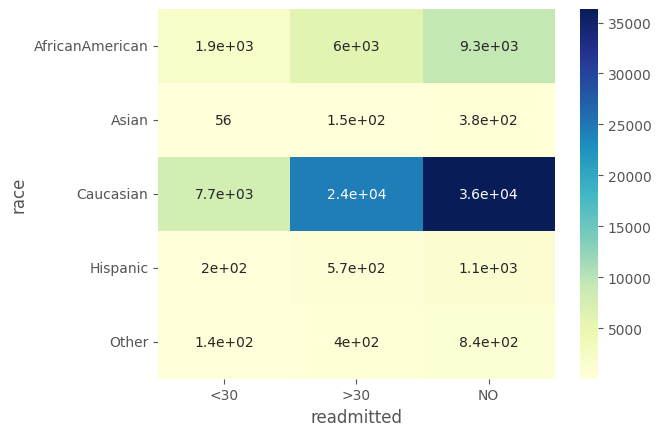

In [ ]:
# Heatmap of contingency table
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_counts = df_train[categorical_columns].nunique()
print(unique_counts)


race                          5
gender                        3
medical_specialty            72
diag_1                      710
diag_2                      730
diag_3                      775
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                3
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazamide                    2
examide                       1
citoglipton                   1
insulin                       4
glyburide-metformin           4
glipizide-metformin           2
glimepiride-pioglitazone      1
metformin-rosiglitazone       2
metformin-pioglitazone        2
change                        2
diabetesMed                   2
readmitt

In [ ]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_counts = df_test[categorical_columns].nunique()
print(unique_counts)


race                          5
gender                        2
medical_specialty            50
diag_1                      471
diag_2                      452
diag_3                      481
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 1
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      3
miglitol                      2
troglitazone                  1
tolazamide                    3
examide                       1
citoglipton                   1
insulin                       4
glyburide-metformin           2
glipizide-metformin           1
glimepiride-pioglitazone      2
metformin-rosiglitazone       2
metformin-pioglitazone        1
change                        2
diabetesMed                   2
readmitt

In [ ]:
df_train.drop(['examide', 'citoglipton'], axis=1, inplace=True)
df_test.drop(['examide', 'citoglipton'], axis=1, inplace=True)

In [ ]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_counts = df_train[categorical_columns].nunique()
print(unique_counts)

race                          5
gender                        3
medical_specialty            72
diag_1                      710
diag_2                      730
diag_3                      775
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                3
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazamide                    2
insulin                       4
glyburide-metformin           4
glipizide-metformin           2
glimepiride-pioglitazone      1
metformin-rosiglitazone       2
metformin-pioglitazone        2
change                        2
diabetesMed                   2
readmitted                    3
dtype: int64


In [ ]:
# Define medication prescription features (expected 4 values)
medication_features = [
    "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
    "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone",
    "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",
    "insulin", "glyburide-metformin", "glimepiride-pioglitazone", "glipizide-metformin",
    "metformin-rosiglitazone", "metformin-pioglitazone"
]

# Create lists for binary, low, and high cardinality features
binary_features = []
low_cardinality_features = []
high_cardinality_features = []

for col in categorical_columns:
    if col == 'gender':  # Special handling for gender (3 expected categories)
        df_train['gender'] = pd.Categorical(df_train['gender'], categories=['Male', 'Female', 'Unknown'])
        df_test['gender'] = pd.Categorical(df_test['gender'], categories=['Male', 'Female', 'Unknown'])
        low_cardinality_features.append('gender')
    elif col in medication_features:  # Special handling for medication (4 expected categories)
        df_train[col] = pd.Categorical(df_train[col], categories=['No', 'Steady', 'Up', 'Down'])
        df_test[col] = pd.Categorical(df_test[col], categories=['No', 'Steady', 'Up', 'Down'])
        low_cardinality_features.append(col)
    elif unique_counts[col] == 2:  # Binary features
        binary_features.append(col)
    elif unique_counts[col] <= 10:  # Low cardinality features
        low_cardinality_features.append(col)
    else:  # High cardinality features
        high_cardinality_features.append(col)

print("Binary features:", binary_features)
print("Low cardinality features:", low_cardinality_features)
print("High cardinality features:", high_cardinality_features)

Binary features: ['change', 'diabetesMed']
Low cardinality features: ['race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'readmitted']
High cardinality features: ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']


# Section 4: Encoding

In [ ]:

# Target variable encoding for training and test datasets
df_train['readmitted'] = df_train['readmitted'].map({'No': 0, '<30': 1, '>30': 2})
df_test['readmitted'] = df_test['readmitted'].map({'No': 0, '<30': 1, '>30': 2})

# Map binary features to 0 and 1
for col in binary_features:
    df_train[col] = df_train[col].map({'No': 0, 'Yes': 1})
    df_test[col] = df_test[col].map({'No': 0, 'Yes': 1})

# Encode high cardinality features using Target Encoding
for col in high_cardinality_features:
    # Compute mean target value for each category in training data
    mapping_train = df_train.groupby(col)['readmitted'].mean()
    # Replace categories with target means
    df_train[f'{col}_encoded'] = df_train[col].map(mapping_train)
    df_test[f'{col}_encoded'] = df_test[col].map(mapping_train)  # Use train mapping for consistency

# Apply one-hot encoding to low cardinality features
df_train = pd.get_dummies(df_train, columns=low_cardinality_features, drop_first=True)
df_test = pd.get_dummies(df_test, columns=low_cardinality_features, drop_first=True)

# Drop original high-cardinality features
df_train.drop(columns=high_cardinality_features, inplace=True)
df_test.drop(columns=high_cardinality_features, inplace=True)


In [ ]:
# Final datasets are encoded
print("Final training data shape:", df_train.shape)
print("Final test data shape:", df_test.shape)

Final training data shape: (91589, 88)
Final test data shape: (10177, 88)


In [ ]:
# Extract features and target variable
X_train = df_train.drop(columns=['readmitted_2.0'])  # Ensure 'readmitted' is not in features
y_train = df_train['readmitted_2.0']

X_val = df_test.drop(columns=['readmitted_2.0'])  # Ensure 'readmitted' is not in features
y_val = df_test['readmitted_2.0']

## SMOTE for handling class imbalance

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  # Replace with 'most_frequent' for categorical features if needed
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Check the new class distribution
print("Original class distribution:", Counter(y_train))
print("SMOTE-adjusted class distribution:", Counter(y_train_smote))

Original class distribution: Counter({False: 59600, True: 31989})
SMOTE-adjusted class distribution: Counter({True: 59600, False: 59600})


# Section 5: Model Training

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation data
y_pred = rf_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.6626707281124103
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.91      0.78      6621
        True       0.55      0.20      0.29      3556

    accuracy                           0.66     10177
   macro avg       0.61      0.55      0.53     10177
weighted avg       0.63      0.66      0.61     10177



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on validation data
y_pred = dt_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.5747273263240641
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.66      0.67      6621
        True       0.40      0.41      0.40      3556

    accuracy                           0.57     10177
   macro avg       0.54      0.54      0.54     10177
weighted avg       0.58      0.57      0.58     10177



Gradient Boosting (LightGBM) without SMOTE

In [ ]:
# Gradient Boosting with LightGBM (No SMOTE)
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the Gradient Boosting model
gbm_model = LGBMClassifier(random_state=42, class_weight='balanced')  # Add class weights to handle imbalance

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random configurations to test
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model with the original unbalanced data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on validation data using the best model
best_model = random_search.best_estimator_
y_pred_gbm = best_model.predict(X_val)
y_pred_proba_gbm = best_model.predict_proba(X_val)[:, 1]  # Probability for the positive class

# Evaluate the tuned model
print("Tuned Gradient Boosting - Accuracy:", accuracy_score(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - Classification Report:\n", classification_report(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_gbm))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 31989, number of negative: 59600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best Parameters: {'num_leaves': 31, 'n_estimators': 50, 'max_depth': -1, 'learning_rate': 0.01}
Tuned Gradient Boosting - Accuracy: 0.6082342537093446
Tuned Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.60      0.67      6621
        True       0.46      0.62      0.53      3556

    accuracy    

Gradient Boosting (LightGBM) with SMOTE

In [ ]:
# Gradient Boosting with LightGBM and Hyperparameter Tuning
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Ensure X_train_smote and y_train_smote from the SMOTE preprocessing step are used

# Define the Gradient Boosting model
gbm_model = LGBMClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random configurations to test
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model with SMOTE-adjusted data
random_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on validation data using the best model
best_model = random_search.best_estimator_
y_pred_gbm = best_model.predict(X_val)
y_pred_proba_gbm = best_model.predict_proba(X_val)[:, 1]  # Probability for the positive class

# Evaluate the tuned model
print("Tuned Gradient Boosting - Accuracy:", accuracy_score(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - Classification Report:\n", classification_report(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gbm))
print("Tuned Gradient Boosting - ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_gbm))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 59600, number of negative: 59600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10101
[LightGBM] [Info] Number of data points in the train set: 119200, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'num_leaves': 50, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2}
Tuned Gradient Boosting - Accuracy: 0.6598211653728997
Tuned Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.90      0.77      6621
        True       0.53      0.22      0.31      3556

    accuracy                           0.66     10177
   macro avg   

Gradient Boosting (XGBoost) without SMOTE

In [ ]:
# Gradient Boosting with XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train) / sum(y_train))  # Adjust for class imbalance

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random configurations to test
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on validation data using the best model
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_val)
y_pred_proba_xgb = best_model.predict_proba(X_val)[:, 1]  # Probability for the positive class

# Evaluate the tuned model
print("Tuned XGBoost - Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Tuned XGBoost - Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("Tuned XGBoost - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("Tuned XGBoost - ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Tuned XGBoost - Accuracy: 0.4538665618551636
Tuned XGBoost - Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.20      0.32      6621
        True       0.38      0.93      0.54      3556

    accuracy                           0.45     10177
   macro avg       0.61      0.56      0.43     10177
weighted avg       0.68      0.45      0.40     10177

Tuned XGBoost - Confusion Matrix:
 [[1322 5299]
 [ 259 3297]]
Tuned XGBoost - ROC-AUC Score: 0.6494312460489335




Gradient Boosting (XGBoost) with SMOTE

In [ ]:
# Gradient Boosting with XGBoost and SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)  # No need for scale_pos_weight as SMOTE balances the data

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random configurations to test
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model with SMOTE-adjusted data (X_train_smote and y_train_smote must already be created in preprocessing)
random_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on validation data using the best model
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_val)
y_pred_proba_xgb = best_model.predict_proba(X_val)[:, 1]  # Probability for the positive class

# Evaluate the tuned model
print("Tuned XGBoost (With SMOTE) - Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Tuned XGBoost (With SMOTE) - Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("Tuned XGBoost (With SMOTE) - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("Tuned XGBoost (With SMOTE) - ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

KNN without SMOTE:

In [ ]:
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=25)  # You can adjust the number of neighbors
# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
# Train the model without SMOTE
knn_model.fit(X_train_imputed, y_train)

X_val_imputed = imputer.transform(X_val)

# Predict on validation data
y_pred_knn = knn_model.predict(X_val_imputed)

# Evaluate the model
print("KNN - Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_val, y_pred_knn))
print("KNN - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

KNN - Accuracy: 0.6471455242212832
KNN - Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.92      0.77      6621
        True       0.48      0.14      0.21      3556

    accuracy                           0.65     10177
   macro avg       0.57      0.53      0.49     10177
weighted avg       0.60      0.65      0.58     10177

KNN - Confusion Matrix:
 [[6100  521]
 [3070  486]]


KNN with SMOTE

In [ ]:
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=20)  # You can adjust the number of neighbors
# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed

# Fit the imputer on the training data and transform it
X_train_imputed_smote = imputer.fit_transform(X_train_smote)
# Train the model without SMOTE
knn_model.fit(X_train_imputed_smote, y_train_smote)

X_val_imputed_smote = imputer.transform(X_val)

# Predict on validation data
y_pred_knn = knn_model.predict(X_val_imputed_smote)

# Evaluate the model
print("KNN - Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_val, y_pred_knn))
print("KNN - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

KNN - Accuracy: 0.5518325636238577
KNN - Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.56      0.62      6621
        True       0.40      0.54      0.46      3556

    accuracy                           0.55     10177
   macro avg       0.54      0.55      0.54     10177
weighted avg       0.59      0.55      0.56     10177

KNN - Confusion Matrix:
 [[3692 2929]
 [1632 1924]]


Logistic Regression

In [ ]:
# 1. Preprocess the training data
# Select numerical columns and drop the target column
X_train = df_train.drop(columns=['readmitted_2.0']).select_dtypes(include=['number'])
y_train = df_train['readmitted_2.0']

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Apply scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data

# Apply SMOTE with partial balance
smote = SMOTE(sampling_strategy=0.64, random_state=42)  # Adjust 0.5 to the desired level of balancing
X_train, y_train = smote.fit_resample(X_train, y_train)

# 2. Train the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Preprocess the test data (apply the same transformations as the training data)
X_test = df_test.select_dtypes(include=['number']).drop(columns=['readmitted_2.0'], errors='ignore')
X_test = scaler.fit_transform(X_test)
y_test = df_test['readmitted_2.0']

# Impute missing values in the test data (using the same imputer fitted on training data)
X_test = imputer.transform(X_test)  # Use the existing imputer, not fitting a new one!

# 4. Make predictions on the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Detailed performance metrics
print(classification_report(y_test, y_pred))